# Objective
Understand ways to find a data set and to prepare a data set for machine learning and training.

## Activities
In this section of the training you will

######  Fetch and visually inspect a dataset
######  Create a dataset to address a real life problem
###### Image Preprocessing
###### Data Augmentation Techniques
###### Address Imbalanced Dataset Problem
###### Organize a dataset into training, validation and testing groups
###### Finalize an augmented dataset for training, and testing



This project starts with Vehicle Make and Model Recognition Dataset (VMMRdb) which is large in scale and diversity, containing 9,170 classes consisting of 291,752 images, covering models manufactured between 1950 to 2016. VMMRdb dataset contains images that were taken by different users, different imaging devices, and multiple view angles, ensuring a wide range of variations to account for various scenarios that could be encountered in a real-life scenario. The cars are not well aligned, and some images contain irrelevant background. The data covers vehicles from 712 areas covering all 412 sub-domains corresponding to US metro areas. VMMRdb dataset can be used as a baseline for training a robust model in several real-life scenarios for traffic surveillance.


###### Dataset : This project starts with [Vehicle Make and Model Recognition Dataset (VMMRdb)](http://vmmrdb.cecsresearch.org/) 

Creating honda_civic_1998
Creating honda_accord_1997
Creating ford_f150_2006
Creating chevrolet_silverado_2004
Creating toyota_camry_2014
Creating nissan_altima_2014
Creating toyota_corolla_2013
Creating dodge_ram_2001
Creating gmc_sierra_2012
Creating chevrolet_impala_2008


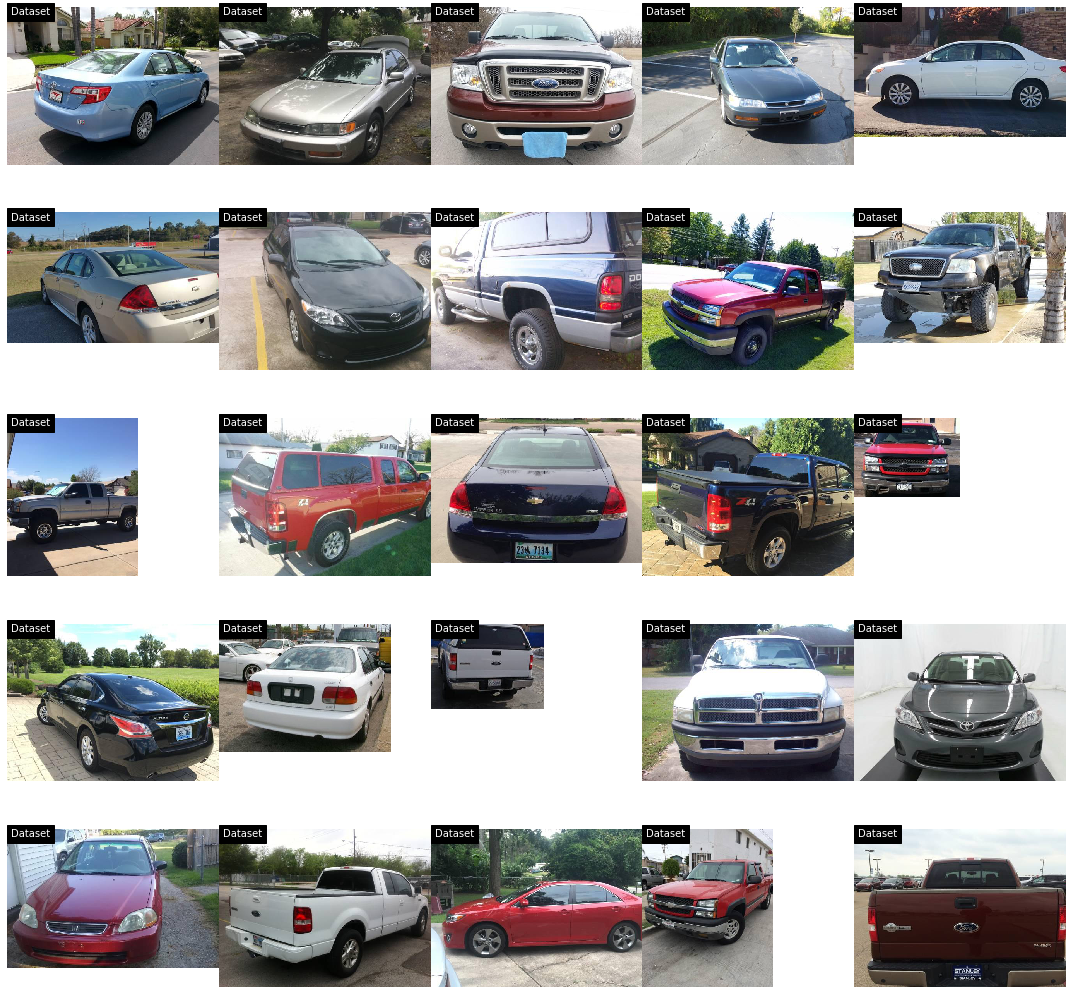

In [1]:
import os
import shutil
import glob
import vmmr_utils
import matplotlib.pyplot as plt
%matplotlib inline

cars = {
    "honda_civic_1998": ["honda_civic_1997", "honda_civic_1998"], # available "honda_civic_1999"
    "honda_accord_1997": ["honda_accord_1996", "honda_accord_1997"],
    "ford_f150_2006": ["ford_f150_2005", "ford_f150_2006", "ford_f150_2007"],
    "chevrolet_silverado_2004": ["chevrolet_silverado_2003", "chevrolet_silverado_2004"], # available "chevrolet_silverado_2005"
    "toyota_camry_2014": ["toyota_camry_2012", "toyota_camry_2013", "toyota_camry_2014", "toyota_camry_le_2012", "toyota_camry_le_2013", "toyota_camry_le_2014", "toyota_camry_se_2012", "toyota_camry_se_2013", "toyota_camry_xle_2012", "toyota_camry_xle_2013"],
    "nissan_altima_2014": ["nissan_altima_2013", "nissan_altima_2014", "nissan_altima_2015"],
    "toyota_corolla_2013": ["toyota_corolla_2011", "toyota_corolla_2012", "toyota_corolla_2013", "toyota_corolla_ce_2012", "toyota_corolla_le_2012", "toyota_corolla_le_2013", "toyota_corolla_s_2011", "toyota_corolla_s_2012"],
    "dodge_ram_2001": ["dodge_ram_1500_2000", "dodge_ram_1500_2001", "dodge_ram_1500_1999", "dodge_ram_1500_1998", "dodge_ram_1500_1997", "dodge_ram_1500_1996", "dodge_ram_1500_1995"],
    "gmc_sierra_2012": ["gmc_sierra_1500_2007", "gmc_sierra_1500_2008", "gmc_sierra_1500_2009", "gmc_sierra_1500_2010", "gmc_sierra_1500_2011", "gmc_sierra_1500_2012", "gmc_sierra_1500_2013", "gmc_sierra_2500_2007", "gmc_sierra_2500_2008", "gmc_sierra_2500_2009", "gmc_sierra_2500_2010", "gmc_sierra_2500_2011", "gmc_sierra_2500_2012", "gmc_sierra_2500_2013"],
    "chevrolet_impala_2008": ["chevrolet_impala_2007", "chevrolet_impala_2008", "chevrolet_impala_2009"]
}


full_dataset_path = "../Dataset/SubsetVMMR"
stolen_cars_path = "../Dataset/Most_Stolen_Cars"

if os.path.exists(stolen_cars_path):
    shutil.rmtree(stolen_cars_path)
else:
    os.makedirs(stolen_cars_path)

for directory, car_list in cars.items():
    print("Creating", directory)
    car_directory_name = os.path.join(stolen_cars_path, directory)
    os.makedirs(car_directory_name)
    for car in car_list:
        path = os.path.join(full_dataset_path, car, "")
        files = glob.glob(path + '*.jpg')
        for file in files:
            shutil.copy(file, car_directory_name)

vmmr_utils.display_images(stolen_cars_path)

#### 2.1 Remove Invalid, Corrupt and Non-JPG files

In [6]:
from multiprocessing import  Pool 

#multiprocessing is a package that supports spawning 
#processes using an API similar to the threading module. 
#The multiprocessing package offers both local and remote concurrency,
#effectively side-stepping the Global Interpreter Lock by using
# subprocesses instead of threads. Due to this, the multiprocessing module allows the programmer
#to fully leverage multiple processors on a given machine. It runs on both Unix and Windows.


if  __name__ == '_main_':
    pool = Pool()
    image_list = glob.glob(stolen_cars_path + "/*/*" )
    pool.map(vmmr_utils.check_images, image_list)
print('Done.')

Done.


# 2.2 Distribution of Selected Classes
Now, we can take a look at the class distribution of our problem statement. We're importing PyGal and creating a wrapper for rendering the chart inline, then passing in our data to the charting function.

In [10]:
import pygal 
from IPython.display import display, HTML

# display the image interrectively
base_html ="""
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""



def galplot(chart):
    rendered_chart = chart.render(is_unicode =True)
    plot_html    = base_html.format(rendered_chart = rendered_chart)
    display(HTML(plot_html))
    
    
#comparision of class distribution

line_chart = pygal.Bar(height = 300)
line_chart.title = 'Stolen car class distribution'


for o in os.listdir(stolen_cars_path):
    line_chart.add(o, len(os.listdir(os.path.join(stolen_cars_path, o))))
galplot(line_chart)



In [4]:
for root , dirs , files in os .walk(stolen_cars_path):
    
    level = root .replace(os.getcwd() , '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    
    for f in files[:2]:
        print('{0}{1}'.format('    ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('    ' * (level + 1), "..."))  

Most_Stolen_Cars/
    chevrolet_impala_2008/
        00000_8xV8B4TpKMW_600x450.jpg
        00101_7geWW6fvNQD_600x450.jpg
        ...
    chevrolet_silverado_2004/
        2003 1500 chevy silverado_00E0E_gcAlN1wRYXi_600x450.jpg
        2003 1500 chevy silverado_00L0L_7y62NcvCcsY_600x450.jpg
        ...
    dodge_ram_2001/
        1995 Dodge Ram 1500 Series_00B0B_edKEc6hVTw4_600x450.jpg
        1995 Dodge Ram 1500 Series_00H0H_1afjSkOKh4E_600x450.jpg
        ...
    ford_f150_2006/
        2005 F-150 Ford Crew Cab_00g0g_130pGW7DYor_600x450.jpg
        2005 F-150 Ford Crew Cab_00q0q_44k9khAOtOG_600x450.jpg
        ...
    gmc_sierra_2012/
        2007 Gm Sierra_00m0m_4i1UirplpqZ_600x450.jpg
        2007 Gm Sierra_00o0o_eB0mcdwxXQK_600x450.jpg
        ...
    honda_accord_1997/
        00000_5GwDIYYFadY_600x450.jpg
        00000_hvGK7QetNWt_600x450.jpg
        ...
    honda_civic_1998/
        00000_8tz5dxzg7te_600x450.jpg
        00000_exCv14ALbej_600x450.jpg
        ...
    nissan_altima

## Create Train, Validation and Test Folders
create training, validation and test folders for data ingestion and we'll use 0.7, 0.1, 0.2 ratio for this purpose.

In [24]:
import math
import re
import sys

#Train and Test Set Variables
train_val_test_ratio = (.7,.1,.2) # 70/10/20 Data Split
test_folder = '../Dataset/test/'
train_folder = '../Dataset/train/'
val_folder = '../Dataset/val/'

file_names = os.listdir('../Dataset/Most_Stolen_Cars')

#Remove Existing Folders if they exist
for folder in [test_folder, train_folder, val_folder]:
    if os.path.exists(folder) and os.path.isdir(folder):
        shutil.rmtree(folder)

#Remake Category Folders in both Train and Test Folders
for category in file_names:
    os.makedirs(test_folder + category)
    os.makedirs(train_folder + category)
    os.makedirs(val_folder + category)

    
    
## split data for the three folders


for idx , category in enumerate(file_names):
    file_list = os.listdir(stolen_cars_path + '/' + category)
    
    
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio =   math.floor(len(file_list) * train_val_test_ratio[1])
    
    
    
    train_list = file_list[: train_ratio]
    val_list   = file_list[train_ratio : val_ratio + train_ratio]
    test_list  = file_list[train_ratio + val_ratio : ]
    
    
    
    for i, file in enumerate(train_list):
        shutil.copy(stolen_cars_path + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s train images to category folder %s' % (len(train_list), category))  
    sys.stdout.write('\n')
    for i, file in enumerate(val_list):
            shutil.copy(stolen_cars_path + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s validation images to category folder %s' % (len(val_list), category))                   
    sys.stdout.write('\n')
    for i, file in enumerate(test_list):
            shutil.copy(stolen_cars_path + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s test images to category folder %s' % (len(test_list), category))
    sys.stdout.write('\n')
    
print("Done.")  

Moving 612 train images to category folder chevrolet_impala_2008
Moving 87 validation images to category folder chevrolet_impala_2008
Moving 176 test images to category folder chevrolet_impala_2008
Moving 570 train images to category folder chevrolet_silverado_2004
Moving 81 validation images to category folder chevrolet_silverado_2004
Moving 164 test images to category folder chevrolet_silverado_2004
Moving 349 train images to category folder dodge_ram_2001
Moving 49 validation images to category folder dodge_ram_2001
Moving 101 test images to category folder dodge_ram_2001
Moving 615 train images to category folder ford_f150_2006
Moving 87 validation images to category folder ford_f150_2006
Moving 177 test images to category folder ford_f150_2006
Moving 298 train images to category folder gmc_sierra_2012
Moving 42 validation images to category folder gmc_sierra_2012
Moving 87 test images to category folder gmc_sierra_2012
Moving 452 train images to category folder honda_accord_1997
M

# Sample Augmentation
While looking at our distribution above we saw that certain classes were significantly lower than others. To help mitigate that issue we're going to augment some of our data set so that we have a dataset that is more closely distributed. Below we're taking a look at an example image and showing the effets of augmentation given a certain threshold of modification. Then we're going to apply these random augmentations to our data.

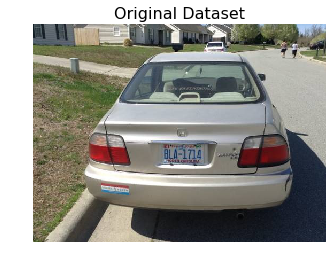

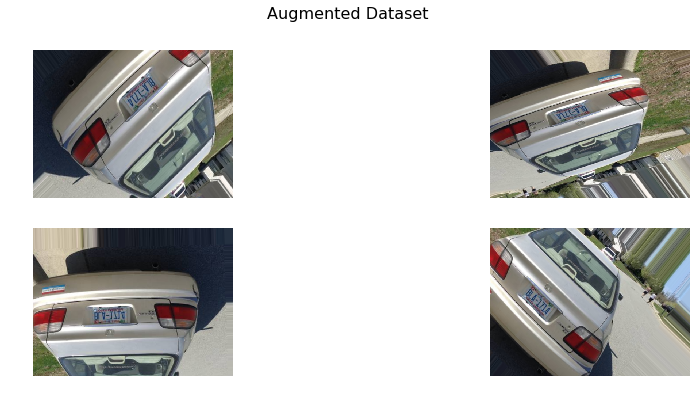

In [27]:
import random 
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator , array_to_img , img_to_array , load_img


#select a random image and do  the argumentation


datagen = ImageDataGenerator(rotation_range    = 45,
                             width_shift_range = 0.2,
                             height_shift_range= 0.2,
                             zoom_range        = 0.3,
                             vertical_flip     = True,
                             horizontal_flip   = True,
                             fill_mode         = "nearest")





file_list = glob.glob("../Dataset/test/*/*")

img_path   = random.choice(file_list)

img = load_img(img_path)
car_class = img_path.split("/")[1]
plt.imshow(img)
plt.axis("off")
plt.title("Original " + car_class, fontsize=16)

img = img_to_array(img)
img = img.reshape((1,) + img.shape)
#Apply different augmentation techniques
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0
for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented " + car_class, fontsize=16)    
    
    i += 1
    if i >= n_augmentations:
        break

# Finalize Augmented Dataset for Training

By using the augmentation techniques we have learned, we can oversample minority classes in training set. We are not going to do these steps in validation or test in order not to create any bias on the data.

In [36]:
def data_augment(data_dir):
    
    list_of_images = os.listdir(data_dir)
    
    datagen        = ImageDataGenerator(rotation_range = 45,
                                       horizontal_flip = True,
                                       fill_mode       = 'nearest')
    
    
    
    for img_name in list_of_images:
        
        tmp_img_name  = os.path.join(data_dir , img_name)
        img   = load_img(tmp_img_name)
        img   = img_to_array(img)
        img   = img.reshape((1 , ) + img.shape)
        
        batch = datagen.flow(img, 
            batch_size=1, 
            seed=21,
            save_to_dir=data_dir, 
            save_prefix=img_name.split(".jpg")[0] + "augmented", 
            save_format="jpg")

        batch.next()
        
            
classes_to_augment = [
    "toyota_camry_2014",
    "nissan_altima_2014",
    "toyota_corolla_2013",
    "gmc_sierra_2012"]

for class_names in classes_to_augment:
    print("Currently Augmenting:", class_names)
    data_dir = os.path.join(train_folder, class_names)
    data_augment(data_dir)    
    

Currently Augmenting: toyota_camry_2014
Currently Augmenting: nissan_altima_2014
Currently Augmenting: toyota_corolla_2013
Currently Augmenting: gmc_sierra_2012



# Depending on the toplogy, we need to resize the images with the expected image format. Since we're going to be using InceptionV3 in the next section we're going to match the size, 299x299, for that topology.



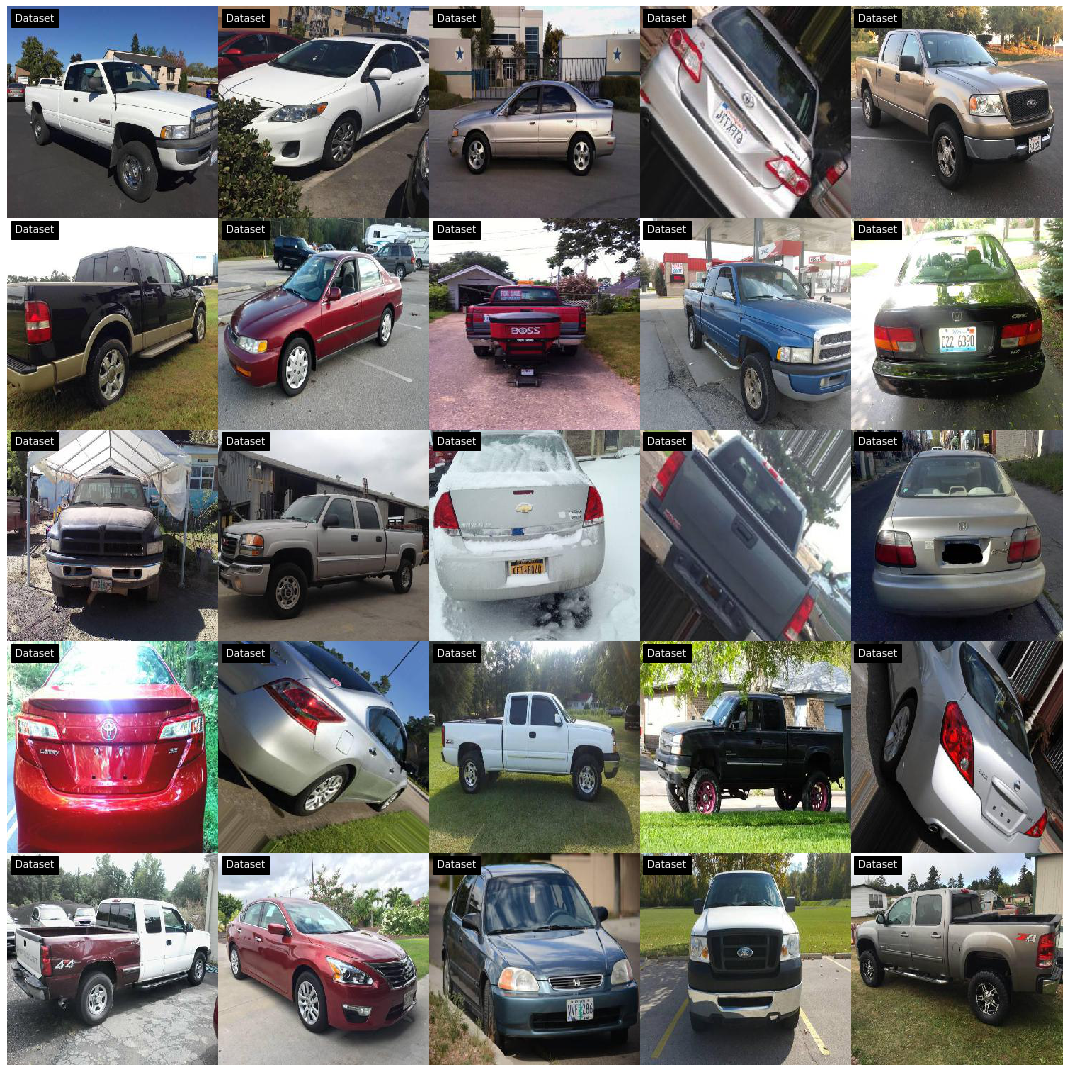

In [37]:
from functools import partial

#Resize Images
if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(train_folder + "/*/*")
    func = partial(vmmr_utils.resize_image, size=299)
    pool.map(func, image_list)
    pool.close()

vmmr_utils.display_images(train_folder)

# Distribution of Selected Classes 

In [38]:
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Most Stolen Car Training Class Distribution'
for o in os.listdir(train_folder):
    line_chart.add(o, len(os.listdir(os.path.join(train_folder, o))))
galplot(line_chart)   